<a href="https://colab.research.google.com/github/naveenbreddy/My-project-works/blob/main/Data_cleaning_Crime_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import calendar

In [2]:
df = pd.read_csv('/content/Crime_data.csv')

In [10]:
df.iloc[0:5,0:5]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19


The Date Rptd column is in Datetime which we dont need so turning it into date

In [17]:
df['Date_rptd'] = pd.to_datetime(df['Date Rptd']).dt.date

In [18]:
df.drop(['Date Rptd'], axis = 1, inplace = True)

In [22]:
#Bringing the date rptd column from the end to 2nd column as it was
col_to_move = df.pop("Date_rptd")

df.insert(1,"Date_rptd",col_to_move)


In [25]:
#to visualize months with most crime - lets bin the dates into months

In [34]:
copy1 = df['Date_rptd']
copy1 = pd.to_datetime(copy1).dt.month
copy1 = copy1.apply(lambda x: calendar.month_name[x])
copy1.head()

0    January
1    January
2      April
3    January
4    January
Name: Date_rptd, dtype: object

In [36]:
df.insert(1,"Crime_month",copy1)

In [45]:
df.iloc[0:5,3:8]

,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2
0,2230,3,Southwest,377,2
1,330,1,Central,163,2
2,1200,1,Central,155,2
3,1730,15,N Hollywood,1543,2
4,415,19,Mission,1998,2


In [43]:
#for now will drop the date_occ column as it is a duplicate - will save it somewhere
crime_occured_date = df.drop(["DATE OCC"], axis = 1, inplace = True)

In [81]:
df['AREA NAME'].value_counts()

Central        48034
77th Street    45429
Pacific        41757
Southwest      40240
Hollywood      38423
Southeast      36774
Olympic        36182
N Hollywood    35798
Newton         35655
Wilshire       33861
Rampart        33267
West LA        33029
Northeast      31146
Van Nuys       30339
West Valley    30018
Harbor         29743
Topanga        29034
Devonshire     28956
Mission        28688
Hollenbeck     27095
Foothill       24232
Name: AREA NAME, dtype: int64

In [86]:
df.isnull().sum()

DR_NO                  0
Crime_month            0
Date_rptd              0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            98453
Vict Age               0
Vict Sex           93865
Vict Descent       93871
Premis Cd              8
Premis Desc          398
Weapon Used Cd    468593
Weapon Desc       468593
Status                 0
Status Desc            0
LOCATION               0
LAT                    0
LON                    0
dtype: int64

In [84]:
df.drop(['Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street'], axis = 1, inplace = True)

In [93]:
df.iloc[0:5,10:15]

,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd
0,0444 0913,36,F,B,501.0
1,0416 1822 1414,25,M,H,102.0
2,1501,0,X,X,726.0
3,0329 1402,76,F,W,502.0
4,0329,31,X,X,409.0


In [96]:
df['Vict Age'].value_counts()

 0      174692
 30      16534
 35      16134
 31      15766
 29      15761
         ...  
 97         56
 98         54
-1          43
-2           8
 120         1
Name: Vict Age, Length: 102, dtype: int64

In [106]:
df[df['Vict Age'] <= 0]['Vict Age'].value_counts()

 0    174692
-1        43
-2         8
Name: Vict Age, dtype: int64

<Axes: xlabel='Vict Age', ylabel='Count'>

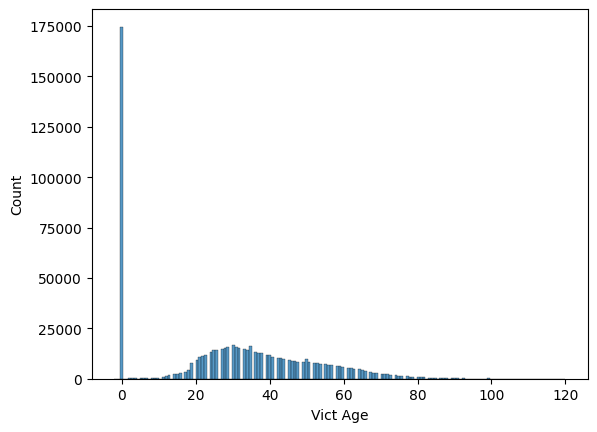

In [109]:
sns.histplot(data = df, x = 'Vict Age')

In [127]:
#x = df.iloc[0:10, 0:10]
vict_age_med = df['Vict Age'].median()
vict_age_med

31.0

In [128]:
df['Vict Age'] = df['Vict Age'].replace([0,-1,-2], vict_age_med)

In [129]:
df.iloc[0:5,10:15]

,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd
0,0444 0913,36,F,B,501.0
1,0416 1822 1414,25,M,H,102.0
2,1501,31,X,X,726.0
3,0329 1402,76,F,W,502.0
4,0329,31,X,X,409.0


In [130]:
df[df['Vict Age'] <= 0]['Vict Age'].value_counts()

Series([], Name: Vict Age, dtype: int64)

In [138]:
df.iloc[0:10,15:20]

,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc
0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other
1,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont
2,POLICE FACILITY,NaN,NaN,AA,Adult Arrest
3,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
4,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont
5,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont
6,DEPARTMENT STORE,NaN,NaN,IC,Invest Cont
7,POLICE FACILITY,NaN,NaN,IC,Invest Cont
8,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
9,OTHER BUSINESS,NaN,NaN,AO,Adult Other


In [137]:
df['Vict Sex'].value_counts()

M    297691
F    265313
X     60749
H        82
Name: Vict Sex, dtype: int64

In [139]:
df['Premis Desc'].value_counts()

STREET                                          180490
SINGLE FAMILY DWELLING                          121900
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     88101
PARKING LOT                                      51255
OTHER BUSINESS                                   33409
                                                 ...  
MTA - SILVER LINE - DOWNTOWN STREET STOPS            2
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                1
MTA - GOLD LINE - LITTLE TOKYO/ARTS DISTRICT         1
DEPT OF DEFENSE FACILITY                             1
HARBOR FRWY STATION (NOT LINE SPECIFIC)              1
Name: Premis Desc, Length: 306, dtype: int64

In [143]:
df['Weapon Used Cd'] = df['Weapon Used Cd'].fillna('No Data')
df['Weapon Desc'] = df['Weapon Desc'].fillna('No Data')

In [142]:
df['Weapon Used Cd'].value_counts()

No Data    468593
400.0      133927
500.0       25620
511.0       18348
102.0       15413
            ...  
120.0           3
119.0           2
123.0           1
121.0           1
124.0           1
Name: Weapon Used Cd, Length: 80, dtype: int64

In [145]:
df.iloc[0:10,20:]

,LOCATION,LAT,LON
0,1100 W 39TH PL,34.0141,-118.2978
1,700 S HILL ST,34.0459,-118.2545
2,200 E 6TH ST,34.0448,-118.2474
3,5400 CORTEEN PL,34.1685,-118.4019
4,14400 TITUS ST,34.2198,-118.4468
5,700 S BROADWAY,34.0452,-118.2534
6,700 S FIGUEROA ST,34.0483,-118.2631
7,200 E 6TH ST,34.0448,-118.2474
8,700 BERNARD ST,34.0677,-118.2398
9,11900 BALBOA BL,34.2864,-118.5021


In [147]:
df.drop(['LOCATION'], axis = 1, inplace = True)

In [148]:
df.to_csv('/content/Crime_data_new.csv', encoding='utf-8', index=False)